In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

In [2]:

model = tf.keras.models.load_model('saved_model\my_model')

In [4]:
DATADIR = r"Traffic Signs"
CATEGORIES = [str(i) for i in os.listdir(DATADIR)]
prediction_dict = dict(zip([i for i, j in enumerate(CATEGORIES)],CATEGORIES))

CATEGORIES
                   

['Ahead_Only',
 'Double_Curve',
 'Keep_Right',
 'Road_Work',
 'Speed_Limit_120',
 'Speed_Limit_30',
 'Speed_Limit_70',
 'Speed_Limit_80',
 'Speed_Limiy_50',
 'Stop']

In [5]:
def decode_prediction(arr):
    out = []
    for i in arr:
        new = sorted(list(i))[-3:]
        for j in new:
            out.append(prediction_dict[list(i).index(j)])
    print("Top 3 Predictions")
    return out[::-1]
        

  16384/Unknown - 0s 1us/step

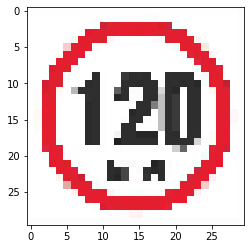

In [14]:
URL = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.UNJqBzm7YD8UOh05-OObuAHaHa%26pid%3DApi&f=1'
img_path = tf.keras.utils.get_file('bird.jpg', URL)


img_array = cv2.imread(img_path)
IMG_SIZE = 30
img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array = np.array(img_array)

plt.imshow(img_array)


x = img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

os.remove(img_path)


In [15]:

prediction = model.predict(x)
decode_prediction(prediction)

Top 3 Predictions


['Speed_Limit_120', 'Speed_Limit_30', 'Speed_Limit_80']

INFO:tensorflow:Assets written to: saved_model/my_model.hd5\assets
